In [ ]:
#the mean of all the treatments of the active ingredient A are equal.
At least, one group mean is different from other groups
ANOVA Assumptions
# The mean across all the three treatments of the active ingregient A are unequal.

#the mean of all the treatments of the active ingredient B are equal.
# The mean across all the three treatments of the active ingregient B are unequal.

The population must be close to a normal distribution.
Samples must be independent.
Population variances must be equal.
Groups must have equal sample sizes.

Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)

𝐻0: 𝜇𝐴 = 𝜇𝐵 = 𝜇C 
𝐻𝐴: 𝜇𝐴 != 𝜇𝐵 =! 𝜇C

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

data = pd.read_csv(r'C:\Users\hp\Downloads\Fever.csv')
data.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


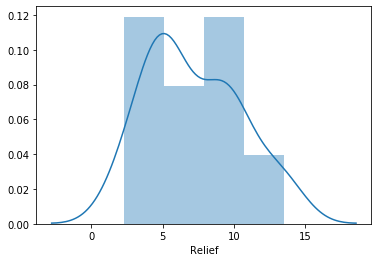

In [5]:
sns.distplot(data['Relief'])

# ONE WAY ANOVA TEST FOR A VARIABLE

In [11]:
#Check sample sizes: equal number of observation in each group


data.groupby('A').size()

A
1    12
2    12
3    12
dtype: int64

In [19]:
#Averages alone are not a good enough description of the situation, though, since there is quite some variation.
data.groupby('A').mean()

,B,Volunteer,Relief
A,,,
1,2.0,2.5,3.883333
2,2.0,2.5,7.833333
3,2.0,2.5,9.833333


In [20]:
data.A = pd.Categorical(data.A)

In [22]:
formula = 'Relief ~ C(A)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [24]:

stats.shapiro(model.resid)
#The test is non-significant, W= 0.9167, p= 0.1715, which indicates that the residuals are normally distributed.
#As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

(0.9256583452224731, 0.01852050982415676)

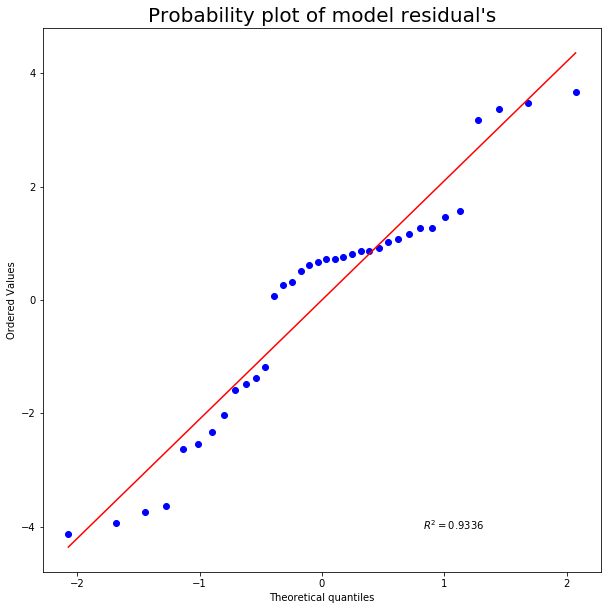

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

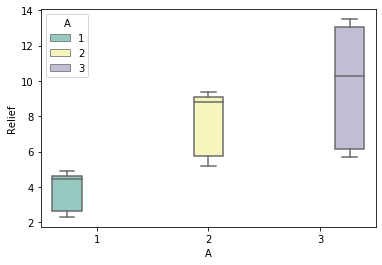

In [28]:
sns.boxplot(x="A", y='Relief',hue="A", data=data, palette="Set3") 

In [65]:
fvalue, pvalue = stats.f_oneway(data['Relief'],data['A'])
print(fvalue, pvalue)

84.90043387756124 1.0719099282626298e-13


In [37]:
#As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances.
#Null hypothesis: samples from populations have equal variances.

# load packages
import scipy.stats as stats
w, p_value_variance = stats.bartlett(data['A'],data['Relief'])
print(w, p_value_variance)


#As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

51.27798357067463 8.01697324298787e-13


In [38]:
print ("Barrett Test for variance p-value=", p_value_variance)

alpha_level = 0.05

if p_value_variance < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('conclude that treatments have equal variances.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('conclude that treatments do not have equal variances.)

Anova one way p-value= 8.01697324298787e-13
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
At least, one group mean is different from other groups


In [35]:
print ("Anova one way p-value=", pvalue)

alpha_level = 0.05

if pvalue < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('At least, one group mean is different from other groups')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('the mean of all the treatments of the active ingredient A are equal.')

two-sample t-test p-value= 1.0719099282626298e-13
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the mean moisture content in of both the samples are  same.


# ONE WAY ANOVA TEST FOR B VARIABLE


In [172]:
data.groupby('B').size()

B
1    12
2    12
3    12
dtype: int64

In [173]:
#Averages alone are not a good enough description of the situation, though, since there is quite some variation.
data.groupby('B').mean()

,A,Volunteer,Relief
B,,,
1,2.0,2.5,4.633333
2,2.0,2.5,7.933333
3,2.0,2.5,8.983333


In [174]:
data.B = pd.Categorical(data.B)

In [175]:
formula = 'Relief ~ C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [176]:

stats.shapiro(model.resid)
#The test is non-significant, W= 0.9167, p= .0316, which indicates that the residuals are normally distributed.
#As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

(0.9333563446998596, 0.0316743329167366)

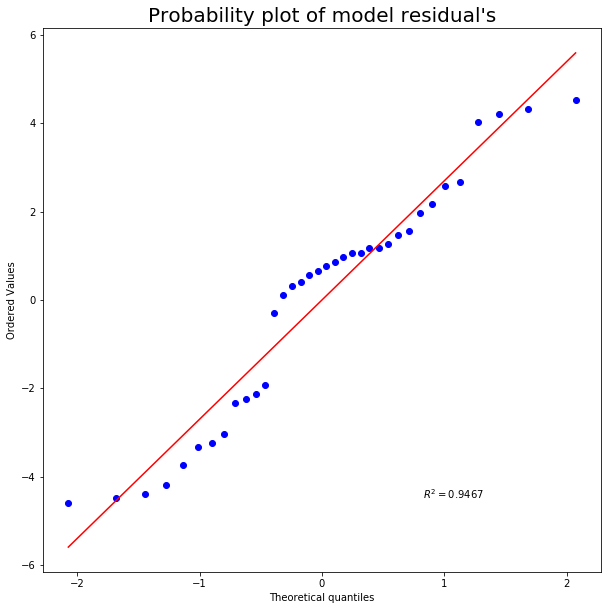

In [177]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

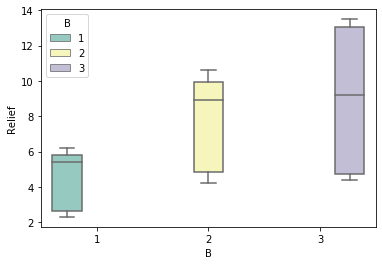

In [179]:
sns.boxplot(x="B", y='Relief',hue="B", data=data, palette="Set3") 

In [180]:
p_value_b=0.00135

print ("Anova one way p-value=", p_value_b)

alpha_level = 0.05

if p_value_b < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('At least, one group mean is different from other groups')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('the mean of all the treatments of the active ingredient A are equal.')

Anova one way p-value= 0.00135
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
At least, one group mean is different from other groups


# TWO WAY ANOVA 


Dependent variable should be measured at the continuous level
•Two independent variables should each consist of two or more categorical, independent groups.
•There should be no significant outliers.
•Dependent variable should be approximately normally distributed for each
    combination of the groups of the two independent variables. 


In [40]:
data.B = pd.Categorical(data.B)

In [41]:
formula = 'Relief ~ C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


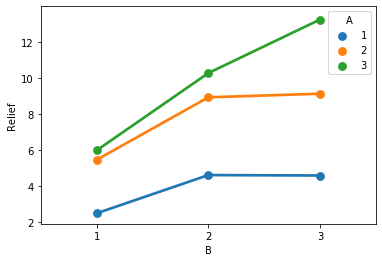

In [64]:
sns.pointplot(x='B', y='Relief', data=data,hue='A',ci=None)

Interactions occur when variables act together to impact the output of the process. Interactions plots are constructed by plotting both variables together on the same graph. They take the form of the graph below. Note that in this graph, the relationship between variable "A" and Y changes as the level of variable "B" changes. When "B" is at its high (+) level, variable "A" has almost no effect on Y. When "B" is at its low (-) level, A has a strong effect on Y. The feature of interactions is non-parallelism between the two lines.

While the plots help you interpret the interaction effects, use a hypothesis test to determine whether the effect is statistically significant. Plots can display non-parallel lines that represent random sample error rather than an actual effect. P-values and hypothesis test help you sort out the real effects from the noise.

Parallel lines: No interaction occurs.

Nonparallel lines: An interaction occurs. The more nonparallel the lines are, the greater the strength of the interaction.

In [54]:
data.groupby(['Volunteer', 'A'])['Relief'].agg(['mean', 'std']).round(2)

mean   std
Volunteer A            
1         1  3.93  1.33
          2  7.93  1.85
          3  9.83  3.70
2         1  3.80  0.96
          2  7.87  2.31
          3  9.73  3.71
3         1  3.87  1.38
          2  7.63  1.85
          3  9.93  3.74
4         1  3.93  1.24
          2  7.90  2.26
          3  9.83  3.51

In [72]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)
p_value_interaction=6.972083e-17

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [74]:
print ("Barrett Test for variance p-value=", p_value_interaction)

alpha_level = 0.05

if p_value_interaction < alpha_level:
    print('We have enough evidence to conclude that the interaction of the two treatments significantly effects in the variable Relief')
 
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('conclude that treatments do not have equal variances.')

Barrett Test for variance p-value= 6.972083e-17
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
conclude that treatments have equal variances.


# QUESTION 2

In [61]:
df=pd.read_csv(r'C:\Users\hp\Downloads\Education.csv')

In [62]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [63]:

df.isnull().any()

Names          False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [50]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,64.000000,56233.000000,118.00000


# UNIVARIATE ANALYSIS

In [136]:
def univariate_analysis(data):
    columns = df.select_dtypes(include='int64').columns
    for i in columns:
        mean=df[i].mean()
        median=df[i].median()
        mode=df[i].mode()

        #print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

        plt.figure(figsize=(10,5)) # set the figure size
        plt.hist(df[i],bins=100,color='lightblue') #Plot the histogram

        plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
        plt.axvline(median,color='blue',label='Median')
        plt.axvline(mode[0],color='red',label='Mode')
        plt.tight_layout(rect=(0, 0, 0.5, 0.5))   

        plt.xlabel(i)   # label the x-axis
        plt.ylabel('Value')   # label the y-axis
        plt.legend()              # Plot the legend
        plt.show()

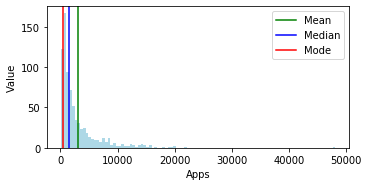

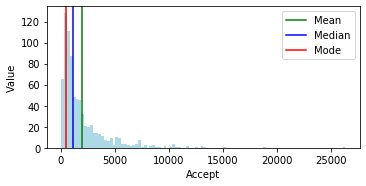

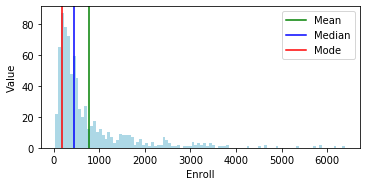

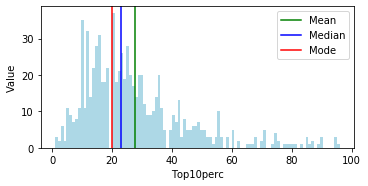

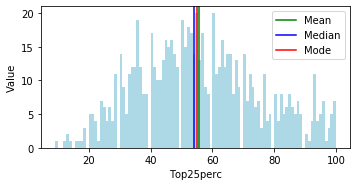

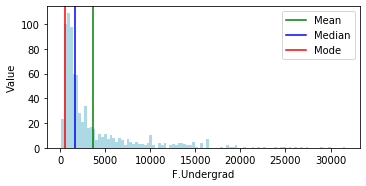

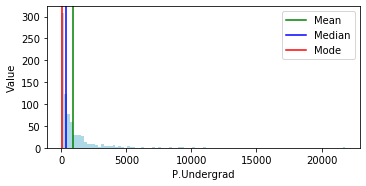

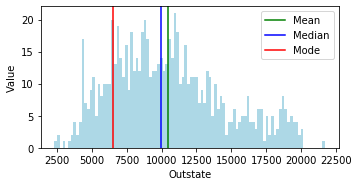

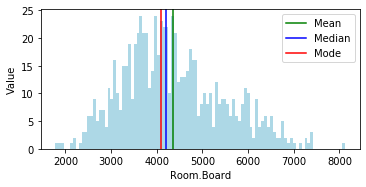

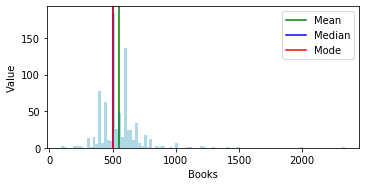

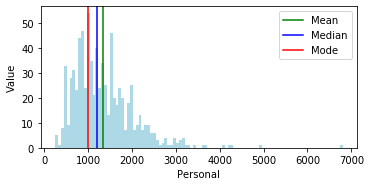

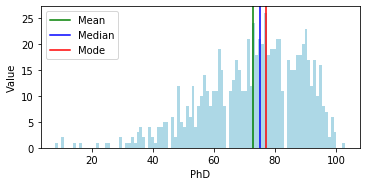

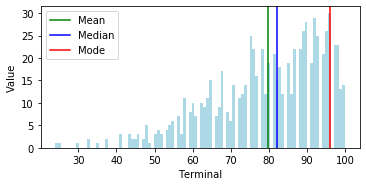

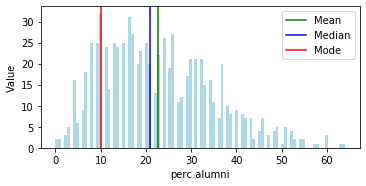

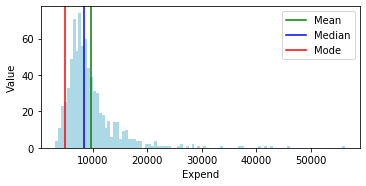

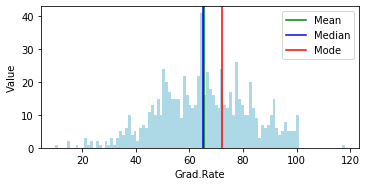

In [137]:
univariate_analysis(df)

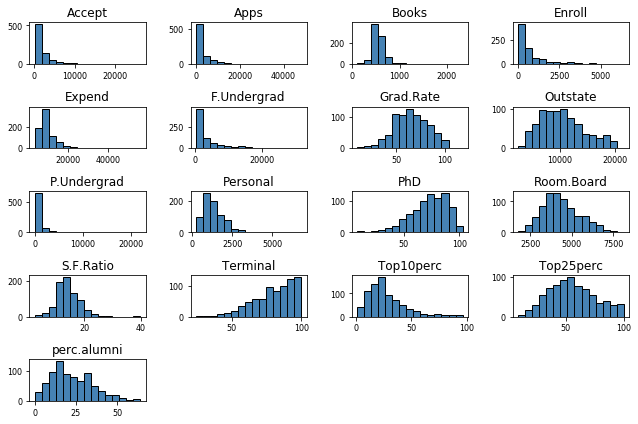

In [138]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

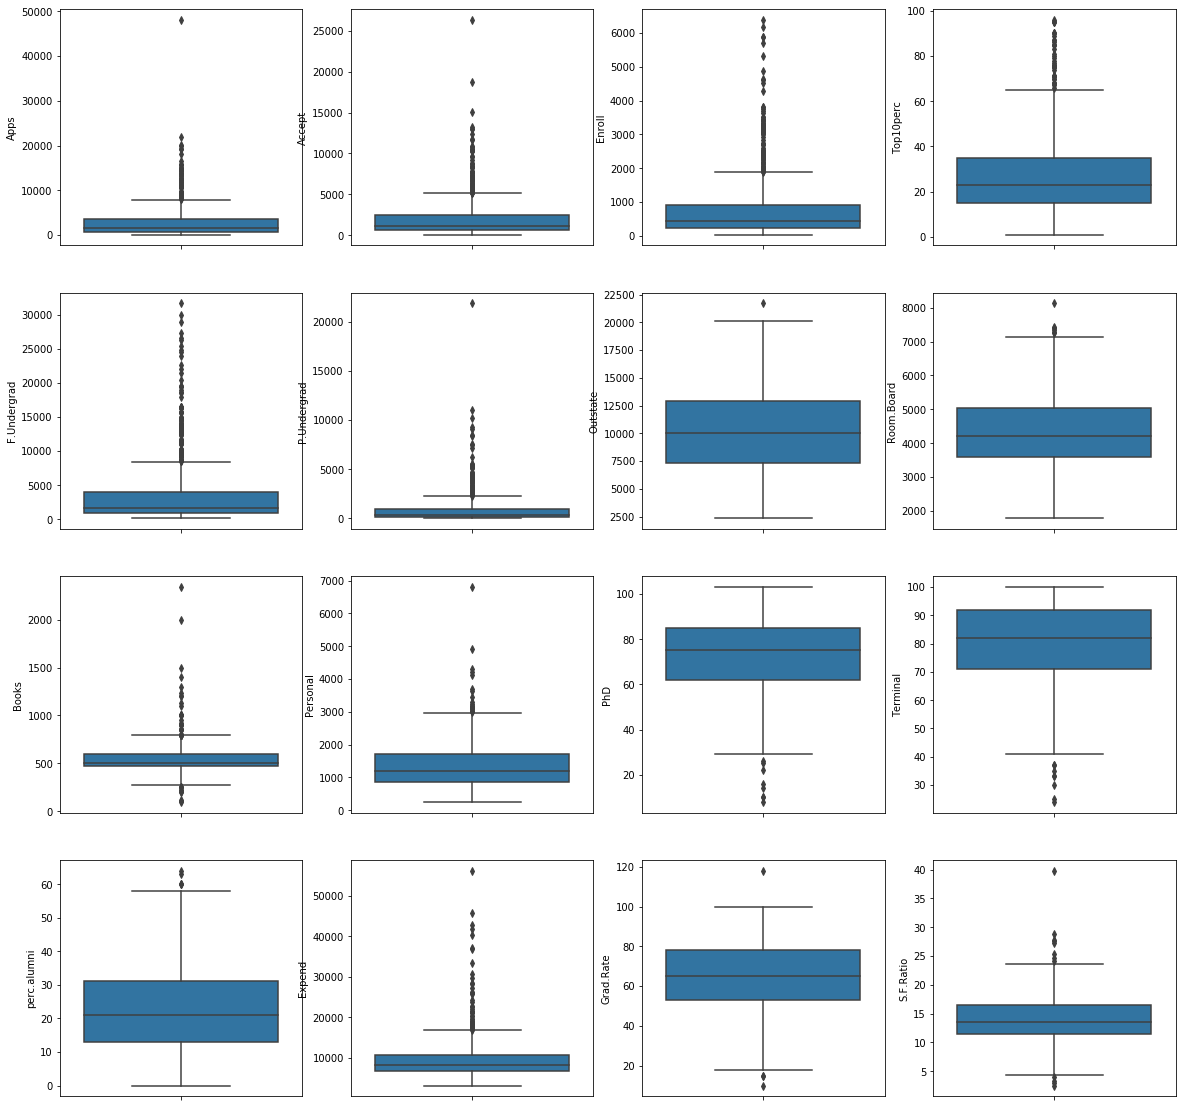

In [74]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(20, 20)

a= sns.boxplot(x=df['Apps'],ax=axes[0][0], orient = "v")
b= sns.boxplot(x=df['Accept'],ax=axes[0][1], orient = "v")
c= sns.boxplot(x=df['Enroll'],ax=axes[0][2], orient = "v")
d= sns.boxplot(x=df['Top10perc'],ax=axes[0][3], orient = "v")

e= sns.boxplot(x=df['F.Undergrad'],ax=axes[1][0], orient = "v")
f= sns.boxplot(x=df['P.Undergrad'],ax=axes[1][1], orient = "v")
g= sns.boxplot(x=df['Outstate'],ax=axes[1][2], orient = "v")
h= sns.boxplot(x=df['Room.Board'],ax=axes[1][3], orient = "v")

i= sns.boxplot(x=df['Books'],ax=axes[2][0], orient = "v")
j= sns.boxplot(x=df['Personal'],ax=axes[2][1], orient = "v")
k= sns.boxplot(x=df['PhD'],ax=axes[2][2], orient = "v")
l= sns.boxplot(x=df['Terminal'],ax=axes[2][3], orient = "v")

m= sns.boxplot(x=df['perc.alumni'],ax=axes[3][0], orient = "v")
n= sns.boxplot(x=df['Expend'],ax=axes[3][1], orient = "v")
o= sns.boxplot(x=df['Grad.Rate'],ax=axes[3][2], orient = "v")
p= sns.boxplot(x=df['S.F.Ratio'],ax=axes[3][3], orient = "v")

plt.show()
            

# Multivariate Analysis

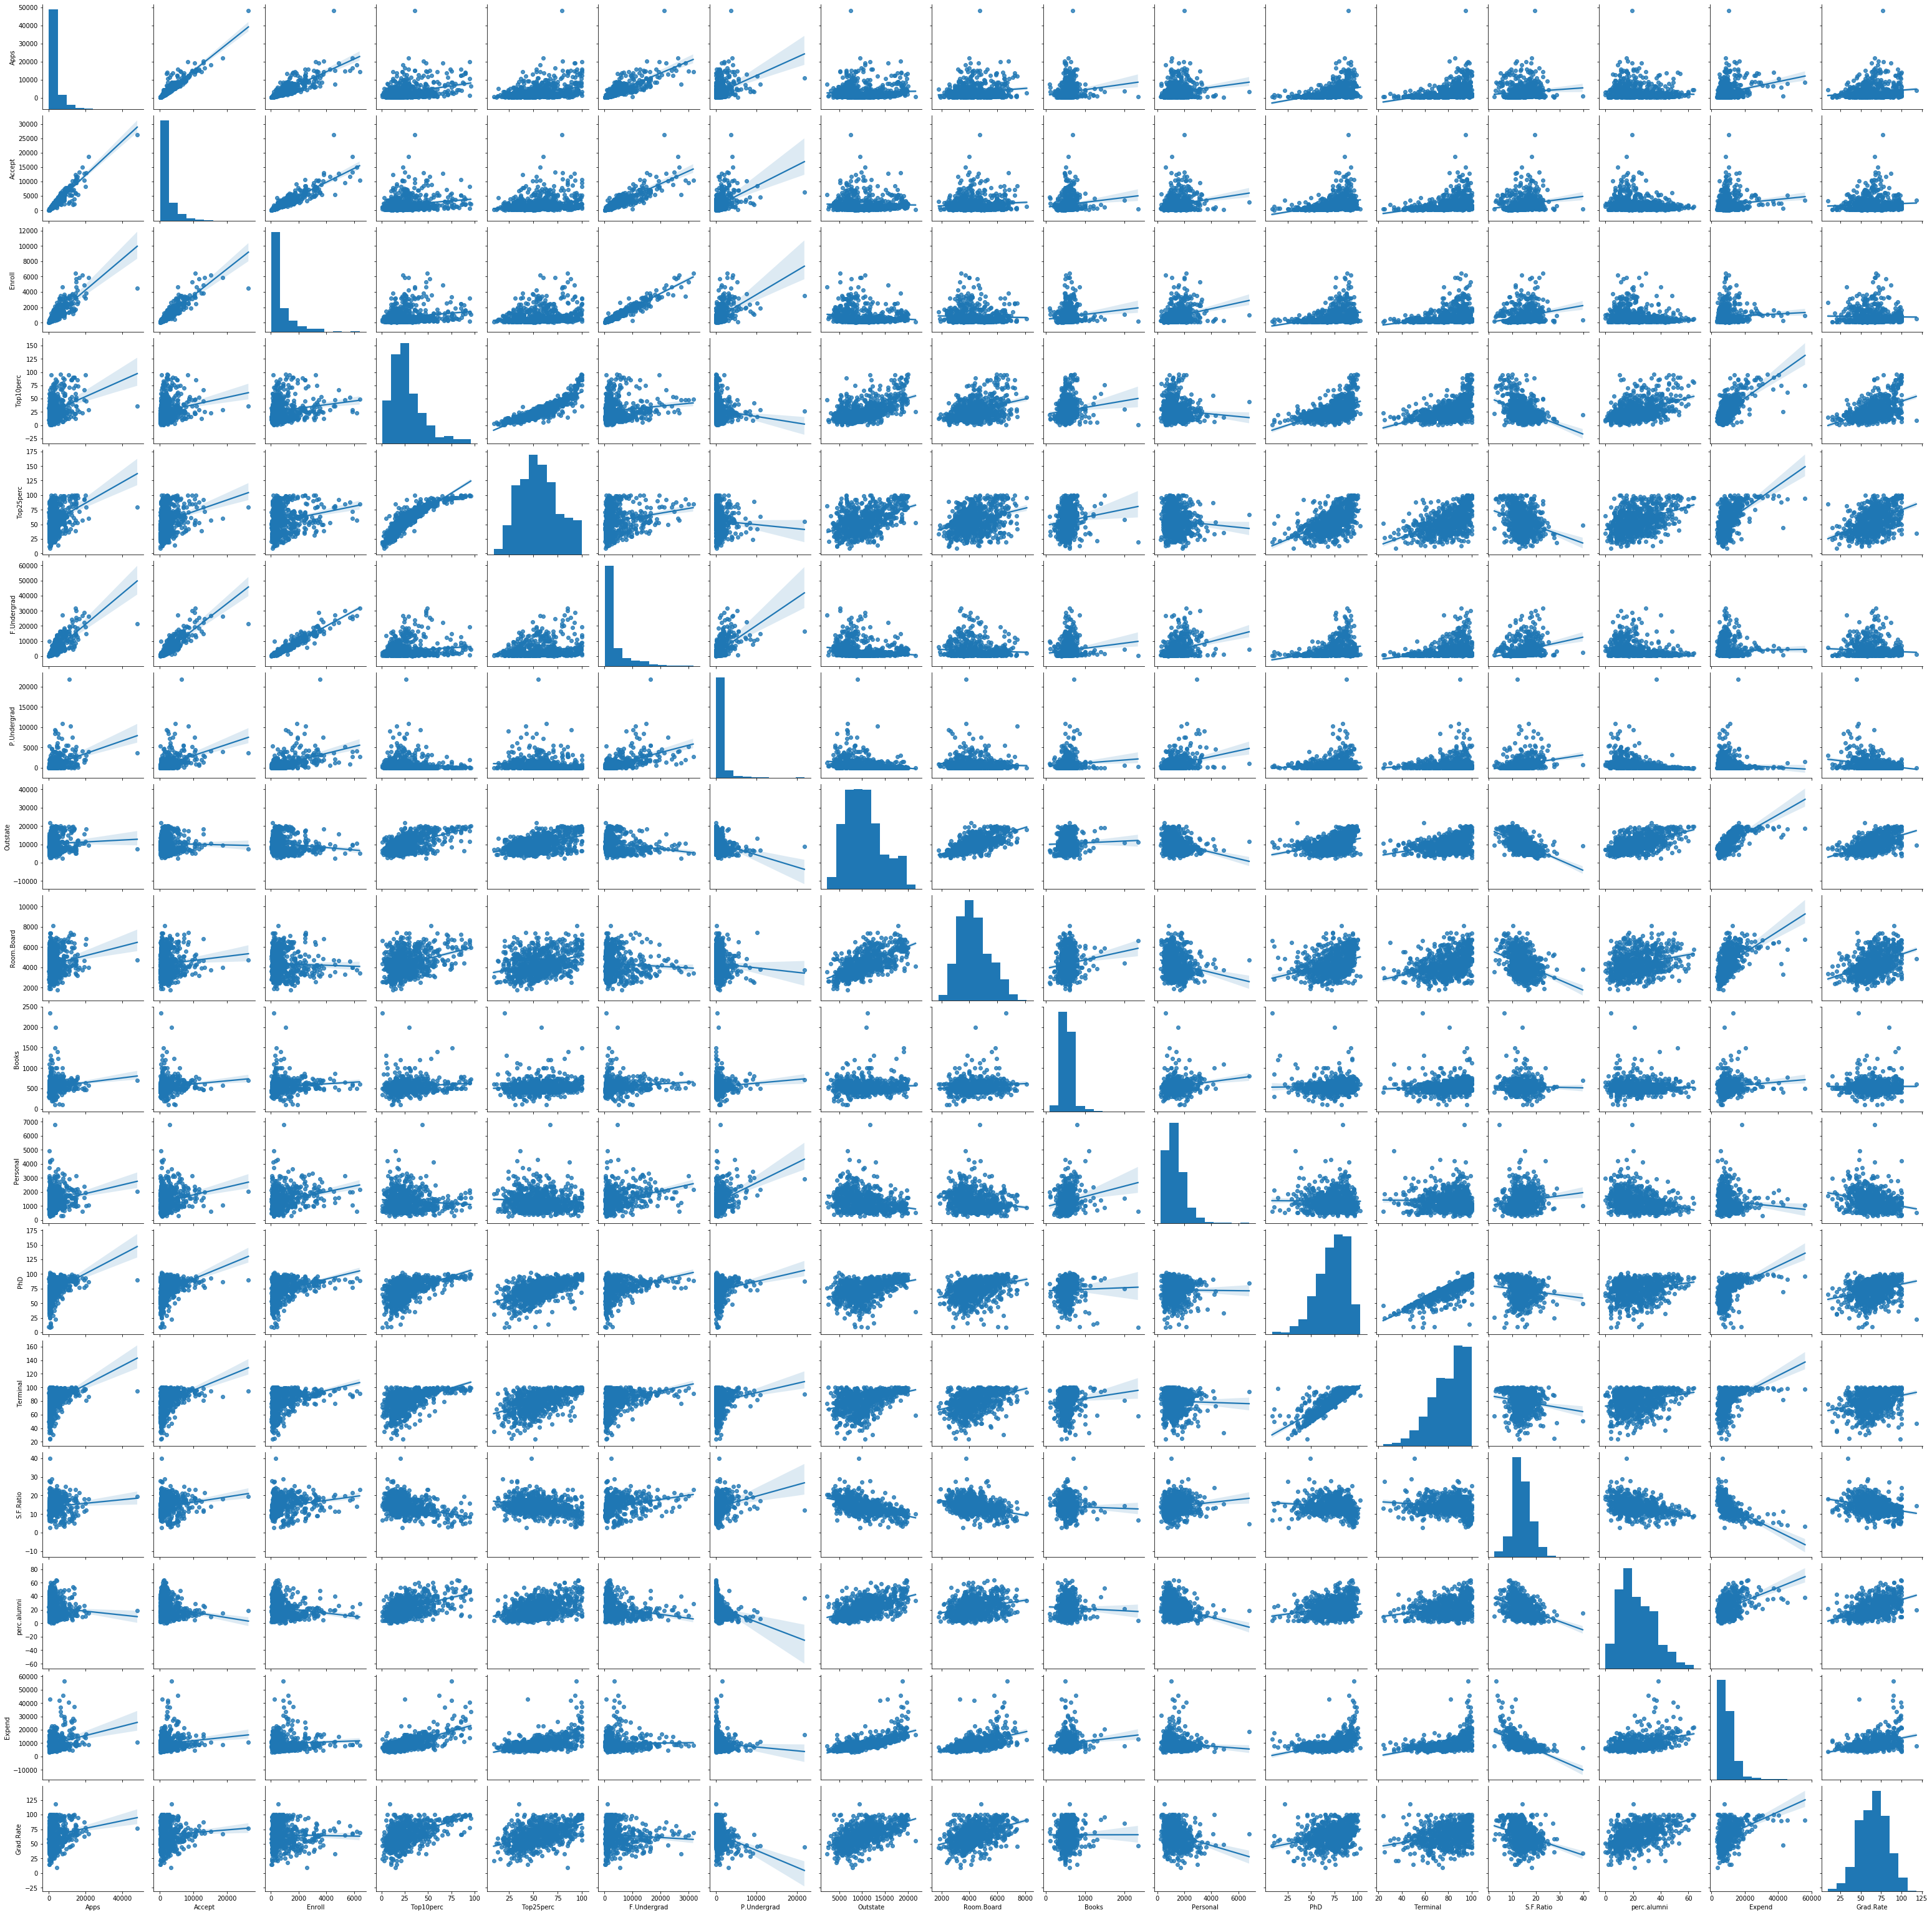

In [75]:
sns.pairplot(df, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

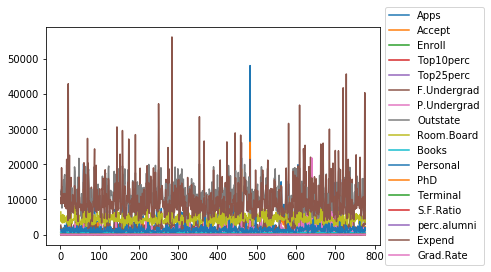

In [80]:
ax = df[1:].plot()
fig.set_size_inches(11.7, 8.27)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

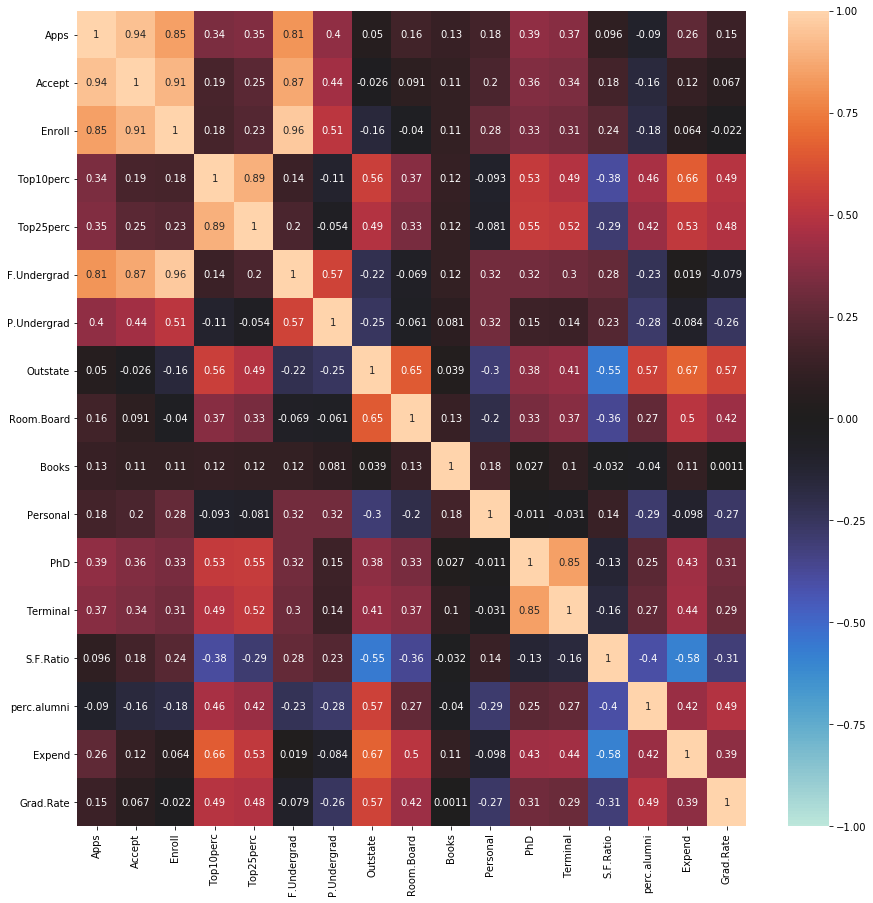

In [127]:
cor=df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor,annot = True, vmin=-1, vmax=1, center= 0)

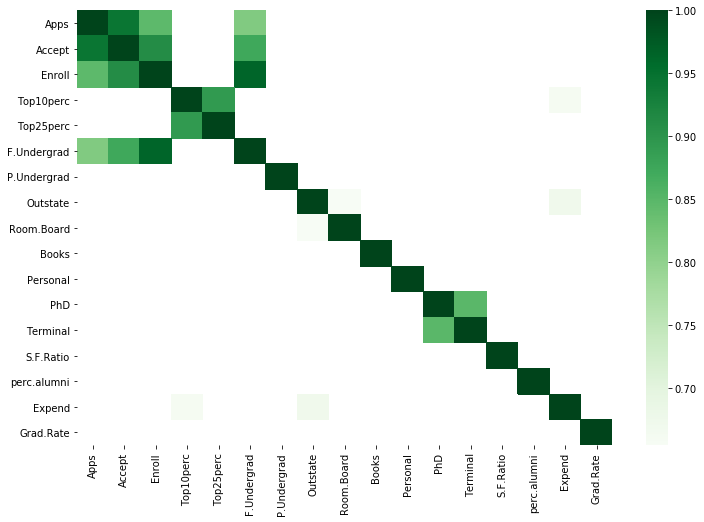

In [128]:
corr = df.corr()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [142]:
correlated = df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
correlated[1:10]

F.Undergrad  Enroll         0.964640
Apps         Accept         0.943451
Accept       Enroll         0.911637
Top25perc    Top10perc      0.891995
Accept       F.Undergrad    0.874223
Terminal     PhD            0.849587
Apps         Enroll         0.846822
F.Undergrad  Apps           0.814491
Outstate     Expend         0.672779
dtype: float64

Text(0.5, 0, 'Top25perc')

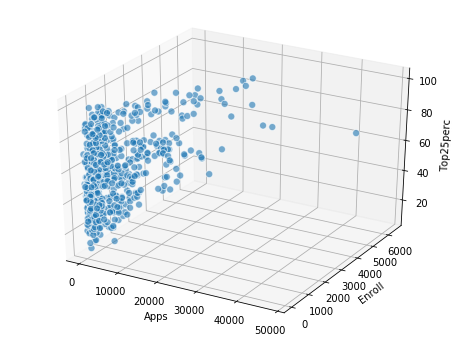

In [144]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Apps']
ys = df['Enroll']
zs = df['Top25perc']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Apps')
ax.set_ylabel('Enroll')
ax.set_zlabel('Top25perc')

# Scaling Variables

In [156]:
#PCA constructs orthogonal - mutually uncorrelated - linear combinations that (successively) explains as much common variation as possible. 
#Scaling the data matrix such that all variables have zero mean and unit variance (also known as "normalizing", "studentisizing", "z-scoring"), makes the two approaches identical



# Drop id and class variables
#data_new = df.drop(['Names'], axis =1)

from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


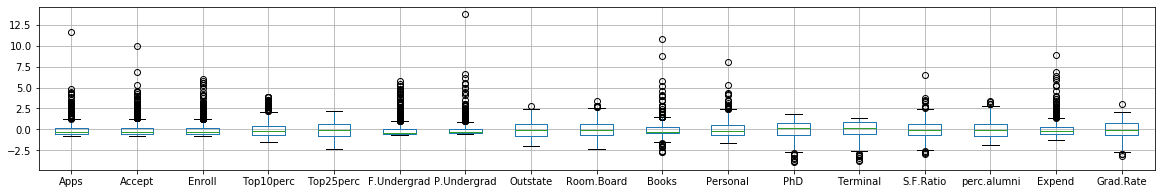

In [157]:
data_new.boxplot(figsize=(20,3))

“Covariance” indicates the direction of the linear relationship between variables. 
“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.
What sets them apart is the fact that correlation values are standardized whereas, covariance values are not. 
You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product 
of the standard deviations of the same values.

The value of covariance is affected by the change in scale of the variables. If all the values of the 
given variable are multiplied 
by a constant and all the values of another variable are multiplied, by a similar or different constant, then the value 
of covariance also changes. However, on doing the same, the value of correlation is not influenced by
the change in scale of the values.


Another difference between covariance and correlation is the range of values that they can assume.
While correlation coefficients lie between -1 and +1, covariance can take any value between -∞ and +∞.

In [158]:

cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [159]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

In [160]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


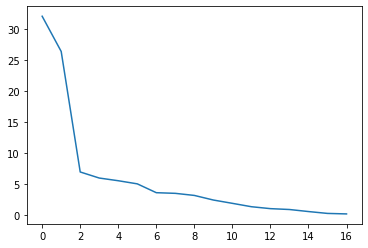

In [161]:
plt.plot(var_exp)
#Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
#We will proceed with 10 components as these can specify 94% variation in the data.


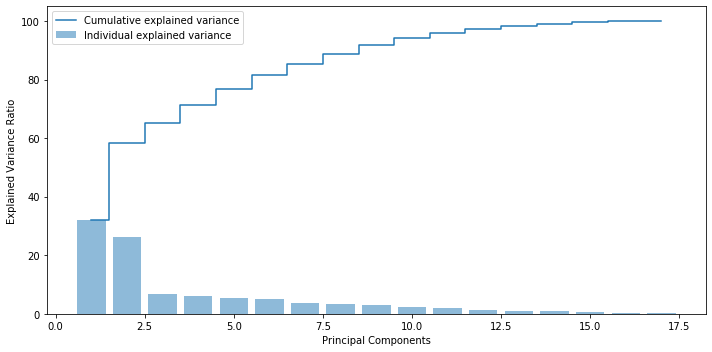

In [162]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [163]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-8.79386137e-01,  4.69253269e-02,  3.08740489e-01, ...,
        -1.28288447e-01, -5.52585842e-01,  6.27409633e-01],
       [ 9.30839439e-02,  1.11378046e+00, -1.05452246e-01, ...,
         2.12374567e-01,  8.19690348e-02,  7.23561569e-01],
       [ 4.85927473e-02,  9.65153628e-01,  6.40659846e-01, ...,
         3.00443253e-01,  9.24891818e-01, -1.20894825e+00]])

In [164]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [165]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


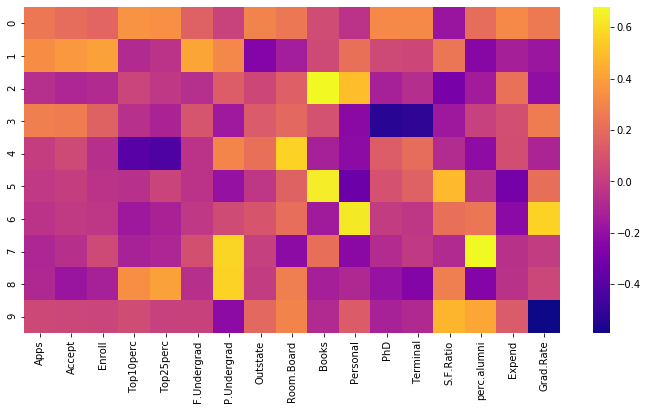

In [166]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: 
The eigenvectors (principal components) determine the directions of the new feature space,
and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the 
variance of the data along the new feature axes.